World Happiness Report

Data Description

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn import linear_model,datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Loading Dataset

In [2]:
df=pd.read_csv('happiness_score_dataset.csv')
df.columns=['Country','Region','Happiness_Rank','Happiness_Score','Standard Error','Economy','Family','Health','Freedom',"Trust","Generosity",'Dystopia_Residual']

In [3]:
new=df.drop(['Region','Standard Error'],axis=1,inplace=True)

In [4]:
df

,Country,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Happiness_Rank     158 non-null    int64  
 2   Happiness_Score    158 non-null    float64
 3   Economy            158 non-null    float64
 4   Family             158 non-null    float64
 5   Health             158 non-null    float64
 6   Freedom            158 non-null    float64
 7   Trust              158 non-null    float64
 8   Generosity         158 non-null    float64
 9   Dystopia_Residual  158 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 12.5+ KB


In [6]:
df.columns

Index(['Country', 'Happiness_Rank', 'Happiness_Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [8]:
df.shape

(158, 10)

In [9]:
df.dtypes

Country               object
Happiness_Rank         int64
Happiness_Score      float64
Economy              float64
Family               float64
Health               float64
Freedom              float64
Trust                float64
Generosity           float64
Dystopia_Residual    float64
dtype: object

In [80]:
df.describe()

,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Checking Null values

In [10]:
df.isnull()

,Country,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

Country              0
Happiness_Rank       0
Happiness_Score      0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia_Residual    0
dtype: int64

Preprocessing

In [81]:
df.drop('Happiness_Rank',axis=1)

,Country,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [82]:
kkt=df.drop(['Country','Happiness_Rank'],axis=1)

In [73]:
feature=kkt.drop('Happiness_Score',axis=1)
target=df['Happiness_Score']
reg=linear_model.LinearRegression()
kkt.head()

,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Model Selection

In [84]:
from sklearn.linear_model import LinearRegression
x=kkt.drop('Happiness_Score',axis=1)
lm=LinearRegression()
lm.fit(x,kkt.Happiness_Score)

LinearRegression()

In [85]:
print('Estimated Intercept is',lm.intercept_)

Estimated Intercept is 6.404859145803243e-05


In [86]:
print('The number of coefficients in this model are',lm.coef_)

The number of coefficients in this model are [1.0001014  0.99997035 0.99988261 0.99969531 0.99991914 1.00006126
 1.00003038]


In [88]:
coeff=zip(x.columns,lm.coef_)
coe=pd.DataFrame(list(zip(x.columns,lm.coef_)),columns=['features','coefficients'])
coe

,features,coefficients
0,Economy,1.000101
1,Family,0.999970
2,Health,0.999883
3,Freedom,0.999695
4,Trust,0.999919
5,Generosity,1.000061
6,Dystopia_Residual,1.000030


In [89]:
lm.predict(x)[0:100]

array([7.58687306, 7.56086907, 7.5269951 , 7.5221512 , 7.42687605,
       7.40600634, 7.37809683, 7.36361171, 7.28599343, 7.2839794 ,
       7.27769703, 7.22570377, 7.19980857, 7.18729884, 7.11949892,
       6.98256953, 6.94617741, 6.94021052, 6.93733396, 6.90131819,
       6.86719164, 6.85292965, 6.81021897, 6.797729  , 6.78623169,
       6.75011207, 6.66967905, 6.61123979, 6.57503565, 6.57405074,
       6.50507315, 6.48510158, 6.47677038, 6.45467149, 6.41114045,
       6.32891816, 6.30240061, 6.29814877, 6.29475912, 6.26925717,
       6.16769691, 6.13015796, 6.12277968, 6.00271476, 5.99509138,
       5.98705124, 5.98374981, 5.97522081, 5.95964459, 5.94818659,
       5.88973714, 5.88900759, 5.87831141, 5.85520035, 5.84765004,
       5.83265734, 5.82827612, 5.82411745, 5.8125162 , 5.79059048,
       5.77040889, 5.75860389, 5.75439185, 5.71585921, 5.70885935,
       5.69529008, 5.68873893, 5.60463238, 5.58863927, 5.54813882,
       5.47703345, 5.47377669, 5.42855813, 5.3987171 , 5.36026

In [91]:
m=np.mean((df.Happiness_Score-lm.predict(x))**2)
print(m)

7.554900759569288e-08


In [92]:
lm2=LinearRegression()
lm2.fit(x[['Family']],df.Happiness_Score)

LinearRegression()

In [93]:
m=np.mean((df.Happiness_Score-lm2.predict(x[['Family']]))**2)

In [94]:
print(m)

0.5881969569191737


Visualization

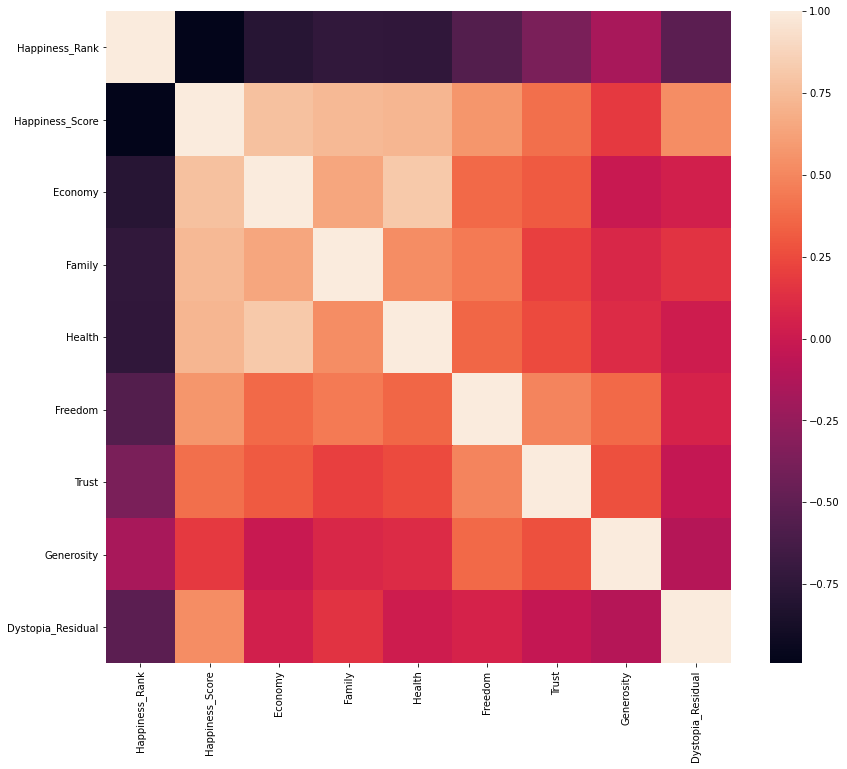

In [12]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr())
plt.show()